# Введение в регрессионный анализ

## Практикум 5. Множественная линейная регрессия

*Алла Тамбовцева*

### Подготовка к работе: импорт необходимых библиотек

Импортируем библиотеку `pandas` для загрузки и обработки данных, модуль `pyplot` для построения графиков и функцию `ols()` из `statsmodels` для построения линейных моделей.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

### Сюжет 1. Множественные линейные модели

Загрузим данные из файла `networks.csv`, с которыми работали в прошлый раз:

In [4]:
df = pd.read_csv("networks.csv")
df.head()

,Unnamed: 0,phase,character,idusers,idnetwork,hint_cloth,hint_col,hat_guess,shirt_guess,pant_guess,...,score_glove,score,num_corrects,num_mistakes,grey,winner,grp_act_num,grp_num_corrects,grp_num_mistakes,pos
0,1,1.0,Freddie,358,1,cappello,nero,9.0,5.0,4.0,...,10.0,50.0,5.0,0.0,0.0,1.0,5.0,25.0,0.0,a
1,3,1.0,Piergiorgio,603,1,guanti,bianco,10.0,10.0,2.0,...,10.0,20.0,2.0,0.0,3.0,1.0,5.0,11.0,2.0,a
2,8,1.0,Marshall,447,1,cappello,bianco,8.0,2.0,2.0,...,10.0,50.0,5.0,0.0,0.0,1.0,5.0,21.0,1.0,a
3,14,1.0,Alberto,184,1,guanti,blu,4.0,5.0,7.0,...,10.0,5.0,2.0,3.0,0.0,0.0,5.0,16.0,8.0,a
4,18,1.0,Teseo,1417,1,cappello,arancione,2.0,3.0,1.0,...,10.0,35.0,4.0,1.0,0.0,1.0,5.0,15.0,4.0,a


В прошлый раз мы частично воспроизводили модель из статьи E.Patacchini et al "Information Transmission in a Social Network: A Field Experiment" и пытались выяснить, зависит ли успешность групповой работы от типа устройства сети сообщества, при условии, что тип сети определяет характер передачи информации, которая приближает группу к выигрышу. Построим модель, показывающую связь между общегрупповым числом правильных ответов и типом сети:

In [5]:
# C() нужно для того, чтобы Python считал эту переменную
# категориальной (C – categorical), то есть нечисловой

mod01 = ols("grp_num_corrects ~ C(idnetwork)", df).fit()
print(mod01.summary())

                            OLS Regression Results                            
Dep. Variable:       grp_num_corrects   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     15.89
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.82e-07
Time:                        04:04:21   Log-Likelihood:                -2057.7
No. Observations:                 660   AIC:                             4121.
Df Residuals:                     657   BIC:                             4135.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.4615      0.39

**Интерпретация:** 

* `Intercept`: константа модели, содержательно это среднее значение зависимой переменной в базовой категории. Базовая категория здесь – это группы, устроенные по первому типу сети, с `idnetwork` равной 1, так как эта категория «выкинута» из выдачи. То есть, мы можем сказать, что среднее общегрупповое число верных ответов в группах, устроенных по типу первой сети, примерно равно 16. 

* `C(idnetwork)[T.2]`: коэффициент при втором типе сети, показывает разницу средних значений зависимой переменной в этой категории и базовой категории. Можем сказать, что среднее общегрупповое число верных ответов в группах, устроенных по типу второй сети, ниже на 0.75 (то есть примерно на 1), чем среднее число верных ответов в группах, устроенных по типу первой сети. Однако этот коэффициент является незначимым на любом разумном уровне значимости (и на 5%, и на 10%) в силу высокого p-value 0.169, поэтому интерпретировать его особого смысла нет. 

* `C(idnetwork)[T.3]`: коэффициент при третьем типе сети, показывает разницу средних значений зависимой переменной в этой категории и базовой категории. Можем сказать, что среднее общегрупповое число верных ответов в группах, устроенных по типу третьей сети, на 2 выше, чем среднее число верных ответов в группах, устроенных по типу первой сети. Оценка коэффициента в данном случае статистически значима на 5%-ном уровне значимости (и на 1%-ном тоже), поэтому различия точно есть. Выходит, третий тип сети самый выгодный, если нас интересует максимизация выигрыша всей группы.

Теперь перейдем к более интересной модели. Про групповую работу (точнее, про зачёт правильных ответов на уровне группы) мы выяснили, давайте посмотрим на индивидуальные достижения участников и их успехи. 

Построим модель, где зависимой переменной является балл, полученный игроком в индивидуальном зачете (`score`), а независимыми – число правильных ответов и тип сети.

In [6]:
# проинтерпретируем

mod02 = ols("score ~ C(idnetwork) + num_corrects", df).fit()
print(mod02.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     3301.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:04:24   Log-Likelihood:                -1868.3
No. Observations:                 660   AIC:                             3745.
Df Residuals:                     656   BIC:                             3763.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -6.0417      0.47

**Интерпретация:** 

* `Intercept`: константа модели, содержательно это среднее значение зависимой переменной в базовой категории в случае, если `num_corrects` равно 0 (здесь уже есть еще одна независимая переменная). То есть, мы можем сказать, что средний балл участника в группах, устроенных по типу первой сети, примерно равен $-6$ **в случае, если участник дает 0 правильных ответов**, то есть постоянно ошибается. Что интересно, здесь наличие отрицательной константы вполне логично с содержательной точки зрения: если игрок ошибается, из его балла вычитаются штрафные очки, то есть при наличии только неправильных ответов он уходит в минус.

* `C(idnetwork)[T.2]`: коэффициент при втором типе сети (предельный эффект второго типа сети), показывает разницу средних значений зависимой переменной в этой категории и базовой категории **при прочих равных условиях**, то есть, если мы сравниваем участников с равным числом верных ответов `num_corrects`.  Оценка коэффициента вновь не является статистически значимой, p-value очень большое, поэтому подробно интерпретировать этот коэффициент не будем.

* `C(idnetwork)[T.3]`: коэффициент при третьем типе сети (предельный эффект третьего типа сети), показывает разницу средних значений зависимой переменной в этой категории и базовой категории **при прочих равных условиях**, то есть, если мы сравниваем участников с равным числом верных ответов `num_corrects`. Можем сказать, что средний балл участников в группах, устроенных по типу третьей сети, при прочих равных условиях, на 0.68 ниже, чем среднее число верных ответов в группах, устроенных по типу первой сети. Оценка коэффициента в данном случае статистически значима на 10%-ном уровне значимости, но не значима на 5%-ном уровне значимости. 

* `num_corrects`: коэффициент при числе правильных ответов, показывает, как и на сколько, в среднем, при прочих равных условиях, изменяется значение `score` при увеличении числа правильных ответов на один. Содержательно, если принять во внимание оговорку «при прочих равных» и то, что экспериментально заставлять участников увеличивать или уменьшать число правильных ответов мы не можем, получим такую интерпретацию: если мы будем сравнивать итоговый балл двух участников в пределах одного и того же типа сети (=при прочих равных), у того участника, у которого число правильных ответов на один больше, итоговый балл будет, в среднем, на 11 выше. Оценка коэффициента статистически значима на любом конвенциональном уровне значимости, что неудивительно: связь между `num_corrects` и `score` очень сильная, так как `num_corrects` непосредственно участвует в формировании итогового балла `score`.


Высокий $R^2$ данной модели, с одной стороны, показывает ее высокую объясняющую и прогностическую силу, модель объясняет почти 94% дисперсии итоговых баллов в игре. Но, с другой стороны, в данном конкретном случае это не означает, что мы построили какую-то супер-модель, наоборот, модель очевидна: итоговый балл `score` напрямую зависит от числа правильных ответов `num_corrects`, так как итоговый балл рассчитывается на основе правильных ответов и штрафных очков. Отсюда и значимость коэффициента при `num_corrects` в сочетании с потерей значимости у коэффициента при `C(idnetwork)[T.3]` – эта переменная «перетянула» на себя весь эффект, очевидно, что зависимость между итоговый баллом и числом правильных ответов окажется более сильной, чем зависимость итоговых баллов от типа сети. 

Модель не очень удачная, но очень хотелось рассмотреть пример модели, где высокий $R^2$ не гарантирует ее качества на содержательном уровне. 

В завершение обсуждения этой модели вопрос: можно ли считать переменную `num_corrects` контрольной, предполагая, что нас больше всего интересует эффект типа сети на набранное число очков? Нет, так как контрольная переменная должна на содержательном уровне оказывать влияние и на независимую переменную интереса в модели, и на зависимую переменную. Здесь число правильных ответов точно оказывает влияние на итоговый результат, а вот на тип сети не влияет никак, участники по группам распределялись случайным образом, к тому же еще до начала игры.

### Сюжет 2. Графики коэффициентов модели

Часто для того, чтобы визуализировать результаты множественной регрессии (а многомерные графики Python и другой софт не строит, трехмерные еще строит, но и они не всегда удобны), используют график коэффициентов, он же *coefficient plot* или *coefplot*. 

Давайте тоже такой график построим! Но выглядеть это будет немного дико. Не будем погружаться в код, просто смиримся, что готовой удобной функции нет, поэтому пришлось позаимствовать и откорректировать кем-то уже написанную огромную функцию:

In [7]:
# как вы думаете, почему такие сложности?
# разработчики библиотеки seaborn с 2017 года решили 
# убрать удобную функцию, которая строила графики по аналогии с R

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns = coef_df.iloc[0]
    
    coef_df = coef_df.drop(0)
    coef_df = coef_df.set_index(coef_df.columns[0])
    coef_df = coef_df.astype(float)

    errors = coef_df['coef'] - coef_df['[0.025']
    coef_df['errors'] = errors
    coef_df = coef_df.sort_values(by=['coef'])

    variables = list(coef_df.index.values)
    coef_df['variables'] = variables
    
    # Create coefficients plot
    fig, ax = plt.subplots(figsize = (16, 9))
    
    # dots for coefficients
    ax.scatter(x = pd.np.arange(coef_df.shape[0]), 
               y = coef_df['coef'], 
               marker = 'o', s = 50, color='steelblue')
    
    # bars for coefficients
    coef_df.plot(x = 'variables', y = 'coef', 
                 kind = 'bar', ax = ax, 
                 color = 'none', ecolor = 'steelblue',
                 yerr = 'errors', legend = False)
    
    # vertical line at y = 0
    ax.axhline(y = 0, linestyle = '--', color = 'red', 
               linewidth = 1);
    
    ax.set_ylabel('Coefficients');
    
    return plt.show()

Но применять эту функцию уже не так страшно, мы должны подать ей на вход результаты нашей модели, то есть объект, который мы получаем через применение `.fit()` к результатам `ols()`:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


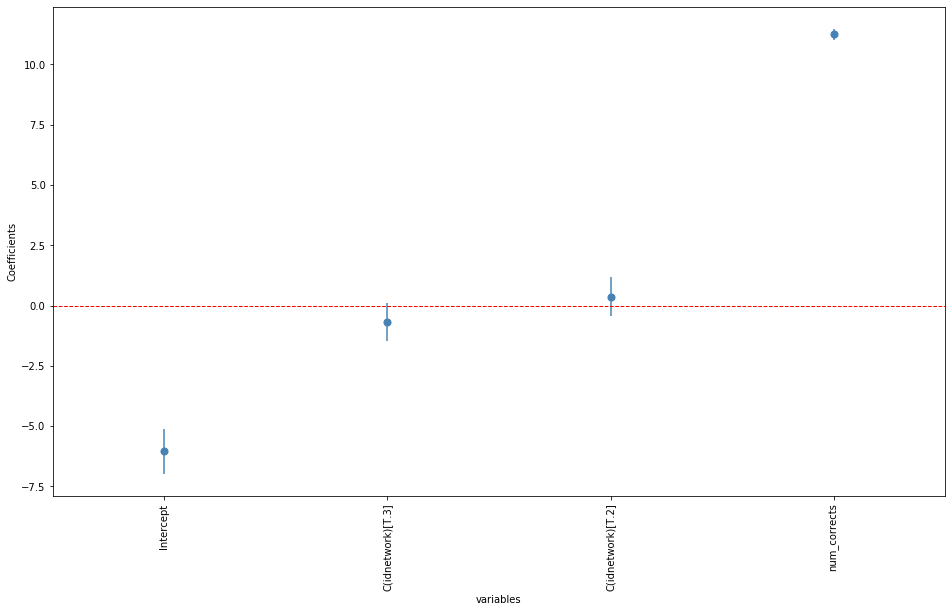

In [8]:
coefplot(mod02)

Готово! Данный график является альтернативой таблицы с результатами линейной регрессии, глядя на него можно понять, какие коэффициенты являются значимыми на 95%-ном уровне доверия или 5%-ном уровне значимости. На графике отмечаются оценки коэффициентов при всех независимых переменных (и константа, в статьях ее обычно убирают) и 95%-ные доверительные интервалы для них. Если доверительный интервал включает значение 0 (то есть пересекает соответствующую 0 пунктирную линию), то на этом уровне доверия оценка коэффициента не будет статистически значима. Если не включает – все хорошо, оценка значима. 

В нашем случае мы можем увидеть, что статистически значимая оценка на 5%-ном уровне значимости тут одна, это оценка коэффициента при `num_corrects`, мы это уже видели по обычной выдаче.

Как строятся такие доверительные интервалы и что еще более концептуального можно вынести из этих графиков – см. в семинарском листочке.

### Сюжет 3: множественная модель и регрессия остатков на остатки

Чтобы разобрать этот сюжет, давайте вернёмся к более понятным данным по квартирам в Москве:

In [9]:
flats = pd.read_csv("flats.csv")
flats.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,730,134,102,10.0,9.0,10,1,1,1
1,477,119,93,15.0,9.0,1,1,0,1
2,350,80,44,14.0,10.5,10,1,1,0
3,410,102,75,10.0,6.5,5,1,1,1
4,50,63,47,7.0,12.0,20,0,1,0


Построим простую модель, где у нас две независимые переменные, одна количественная, другая – бинарная, модель, показывающую, каким образом цена квартиры зависит от ее общей площади и шаговой доступности метро:

In [10]:
mod03 = ols("price ~ totsp + walk", flats).fit()
print(mod03.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1478.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:04:57   Log-Likelihood:                -10035.
No. Observations:                2040   AIC:                         2.008e+04
Df Residuals:                    2037   BIC:                         2.009e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -72.5788      3.770    -19.252      0.0

Допустим, нас интересует коэффициент при переменной `totsp`. Как получить его, пользуясь теоремой Фриша-Во-Ловелла? Вспомним идею регрессии остатков на остатки с лекции:

**Шаг 0.** Есть множественная модель линейной регресии `y ~ x + z`. Все три переменные как-то связаны, чтобы оценить характер связи между `x` и `y`, нужно «очистить» эту связь от «примесей», возникающих из-за связи `z` и `y`.  

**Шаг 1.** Строим модель `y ~ z` и забираем из нее остатки – ту часть, которая не объясняется `z`, а значит, это `y`, очищенный от влияния `z`.

**Шаг 2.** Строим модель `x ~ z` и забираем из нее остатки – ту часть, которая не объясняется `z`, а значит, это `x`, очищенный от влияния `z`.

**Шаг 3.** Строим модель `residuals 1 ~ residuals 2`, то есть остатки первой модели на остатки второй модели, что эквивалентно регрессии `y` на `x`, очищенных от влияния `z`, и что по смыслу вполне совпадает с интерпретацией коэффициентов через предельный эффект «при прочих равных условиях» (раз `z` мы считаем постоянным, а в этом и равенство условий, он никак не меняется и, следовательно, влияния никакого не оказывает).

В нашем случае `y` – это `price`, `x` – это `totsp`, а `z` – это `walk`. Реализуем все описанные выше шаги. Построим две вспомогательные модели:

In [11]:
# шаг 1: модель для очищения цены от влияния шаговой доступности
aux01 = ols("price ~ walk", flats).fit()

In [12]:
# шаг 2: модель для очищения площади от влияния шаговой доступности
aux02 = ols("totsp ~ walk", flats).fit()

Заберем из них остатки и сохраним в маленький датафрейм:

In [13]:
new = pd.DataFrame()
new["resid01"] = aux01.resid
new["resid02"] = aux02.resid

Построим итоговую модель и сравним с множественной моделью `mod03`, которая была раньше:

In [14]:
mod_fin = ols("resid01 ~ resid02", new).fit()
print(mod_fin.summary())

                            OLS Regression Results                            
Dep. Variable:                resid01   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     2842.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:05:04   Log-Likelihood:                -10035.
No. Observations:                2040   AIC:                         2.007e+04
Df Residuals:                    2038   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.041e-13      0.734   5.51e-13      1.0

Так и есть! Коэффициент в итоговой модели при `resid02` в точности совпадает с коэффициентом при `totsp` в множественной модели, которая была ранее.